<a href="https://colab.research.google.com/github/JoseFerrer/Intro_Signal_Proc/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Peruana Cayetano Heredia**
## **Introducción a Señales Biomédicas**


### Redes Neuronales 🤖

*   Prof. José Ferrer, M.Sc.
*   Prof. Gissella Bejarano, M.Sc., PhD (c.)
*   Prof. Pablo Fonseca, M.Sc.

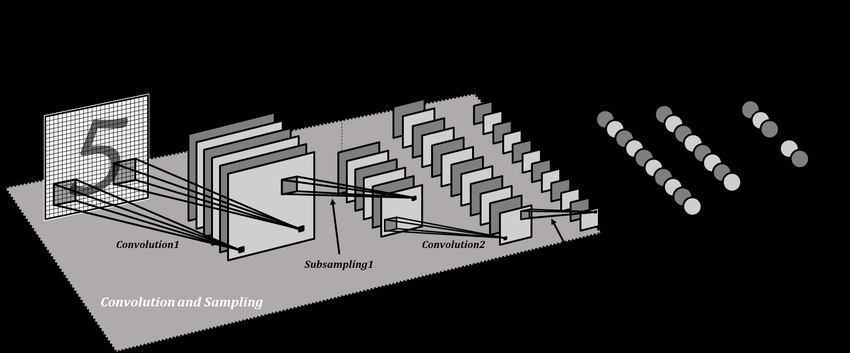

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [ ]:
#@title Obtener datos
!gdown --id 18N39juq4WApQZC1K-LR6RAvpenOqT3eF
!gdown --id 1Dwid8In4AuWv6wYMb6a3pi_JlgKbykf_
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

In [ ]:
#@title Visualizando el `dataset`
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

## Crear una red neuronal

In [ ]:
#@title #**Estructura de la Red Neuronal**

lr = 0.1 #@param ["0.00001", "0.00005", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1", "0.5"] {type:"raw"}

#@markdown ##**Capa 1**
n_filters_1 = 32 #@param ["16", "32", "64", "128", "256"] {type:"raw"}
filter_size_1 = 3 #@param ["3", "5", "7", "9"] {type:"raw"}
activation_1 = "relu" #@param ["relu", "sigmoid", "tanh", "elu"]
#@markdown ##**Capa 2**
n_filters_2 = 16 #@param ["16", "32", "64", "128", "256"] {type:"raw"}
filter_size_2 = 3 #@param ["3", "5", "7", "9"] {type:"raw"}
activation_2 = "relu" #@param ["relu", "sigmoid", "tanh", "elu"]
#@markdown ##**Capa 3**
n_filters_3 = 16 #@param ["16", "32", "64", "128", "256"] {type:"raw"}
filter_size_3 = 3 #@param ["3", "5", "7", "9"] {type:"raw"}
activation_3 = "relu" #@param ["relu", "sigmoid", "tanh", "elu"]
#@markdown ##**Capa Totalmente Conectada**
n_filters_fc = 64 #@param ["16", "32", "64", "128", "256"] {type:"raw"}
activation_fc = "relu" #@param ["relu", "sigmoid", "tanh", "elu"]


model = Sequential([Conv2D(n_filters_1, filter_size_1, activation=activation_1, input_shape=(*size,1), padding='same'),
                    MaxPool2D(),
                    Conv2D(n_filters_2, filter_size_2, activation=activation_2, padding='same'),
                    MaxPool2D(),
                    Conv2D(n_filters_3, filter_size_3, activation=activation_3, padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(n_filters_fc, activation=activation_fc),
                    Dense(10, activation='softmax')])

model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model)

## Entrenamiento

In [ ]:
#@title #**Entrenamiento de la Red Neuronal**

bs = 10 #@param {type:"slider", min:1, max:64, step:1}
epochs = 21 #@param {type:"slider", min:1, max:200, step:10}
log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=(X_test, y_test))
show_results(model, log)

In [ ]:
#@title Obtener una imagen aleatoria
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

In [ ]:
#@title Predecir
salida = model.predict(im[None,:,:,:])[0]
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), label ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(10), salida)
plt.plot()